In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Getting first image
no image yet
image 0 OK!!!


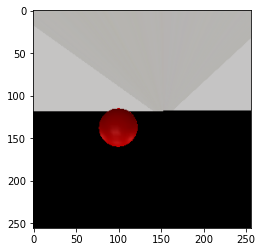

image 1 OK!!!


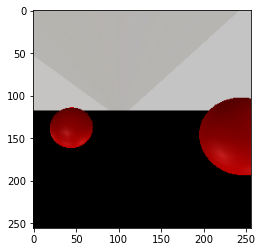

image 2 OK!!!


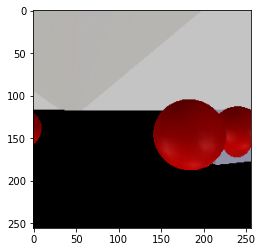

image 3 OK!!!


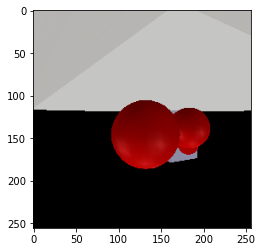

image 4 OK!!!


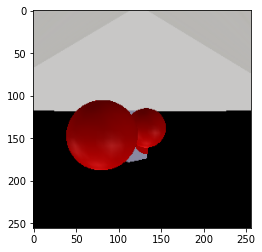

image 5 OK!!!


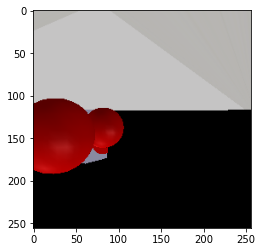

image 6 OK!!!


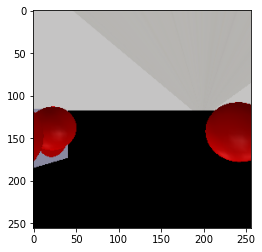

image 7 OK!!!


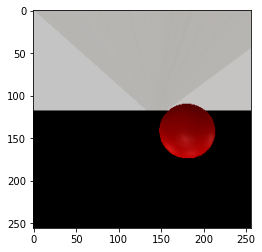

image 8 OK!!!


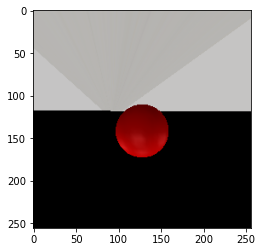

image 9 OK!!!


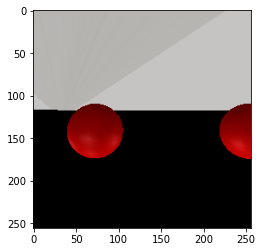

image 10 OK!!!


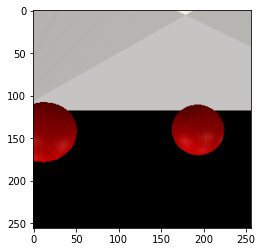

image 11 OK!!!


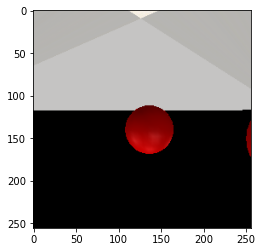

image 12 OK!!!


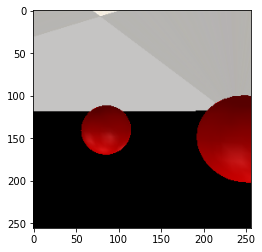

image 13 OK!!!


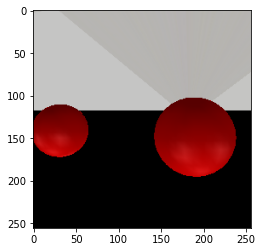

image 14 OK!!!


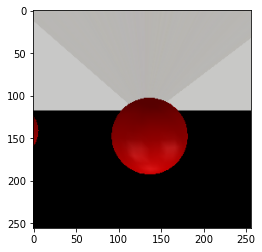

image 15 OK!!!


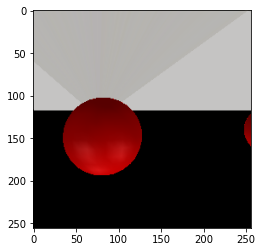

image 16 OK!!!


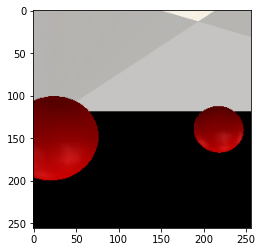

image 17 OK!!!


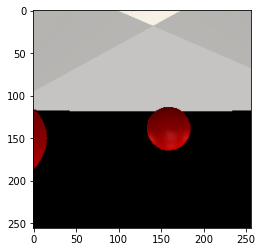

image 18 OK!!!


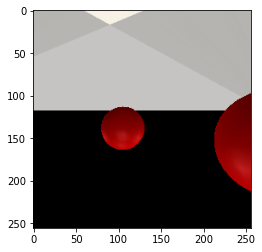

image 19 OK!!!


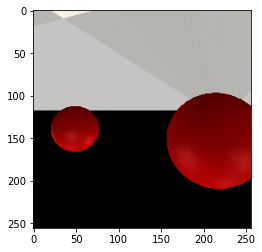

image 20 OK!!!


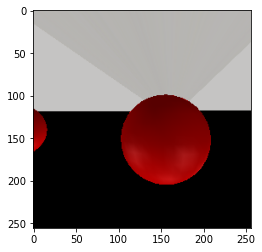

image 21 OK!!!


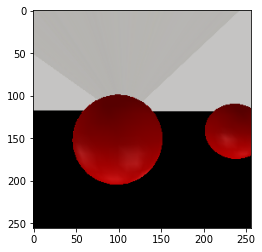

image 22 OK!!!


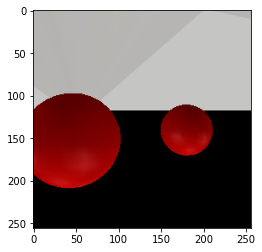

image 23 OK!!!


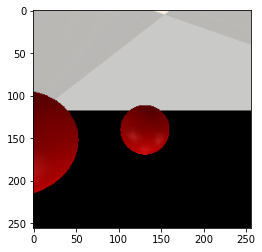

image 24 OK!!!


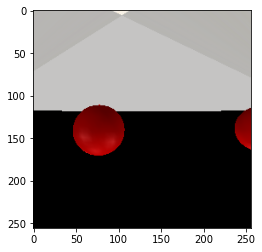

image 25 OK!!!


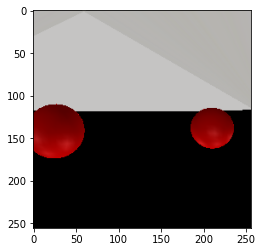

image 26 OK!!!


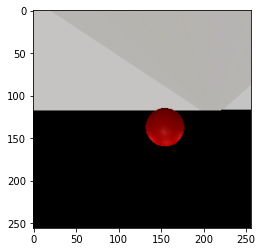

image 27 OK!!!


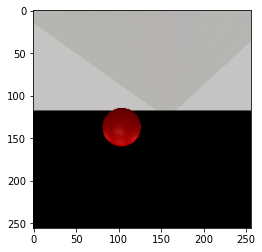

image 28 OK!!!


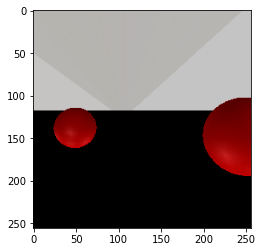

image 29 OK!!!


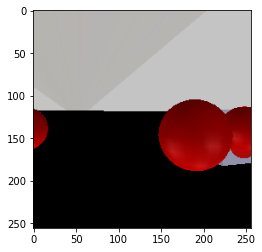

image 30 OK!!!


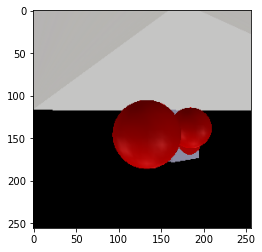

image 31 OK!!!


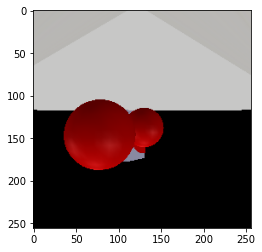

image 32 OK!!!


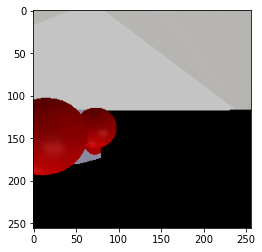

image 33 OK!!!


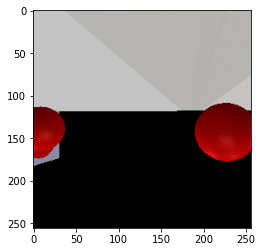

image 34 OK!!!


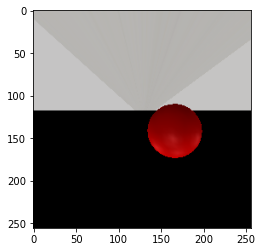

image 35 OK!!!


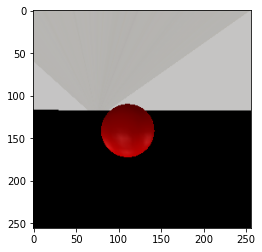

image 36 OK!!!


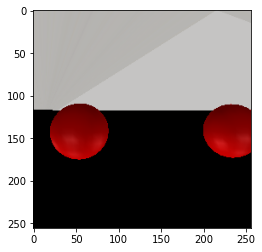

image 37 OK!!!


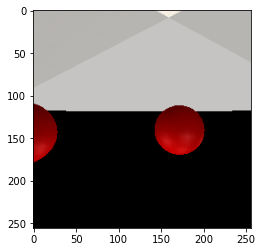

image 38 OK!!!


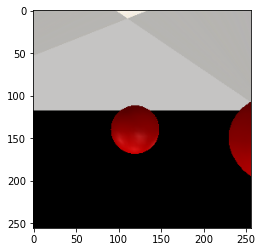

image 39 OK!!!


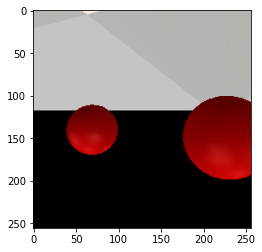

image 40 OK!!!


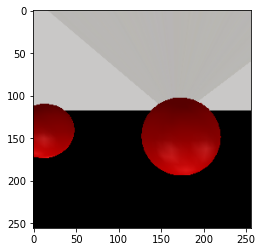

image 41 OK!!!


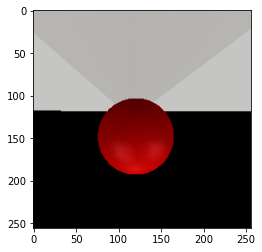

image 42 OK!!!


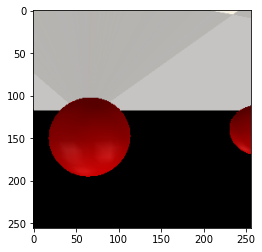

image 43 OK!!!


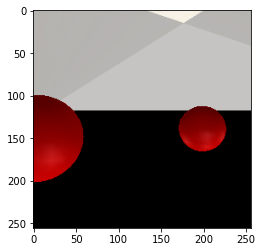

image 44 OK!!!


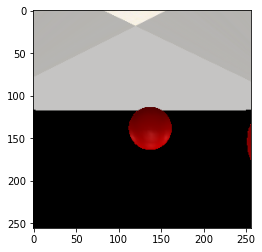

image 45 OK!!!


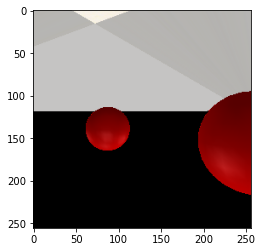

image 46 OK!!!


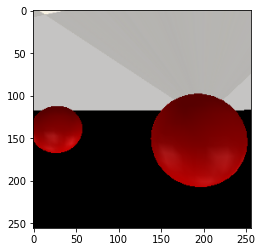

image 47 OK!!!


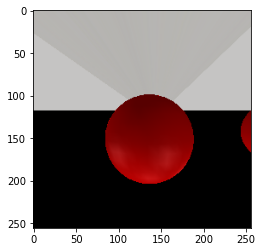

image 48 OK!!!


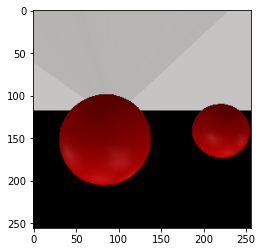

image 49 OK!!!


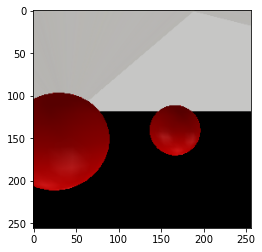

In [2]:
import sim as vrep
import time
import cv2
import numpy as np
from IPython.display import clear_output

vrep.simxFinish(-1)

clientID = vrep.simxStart('127.0.0.1', 19999, True, True, 5000, 5)

if clientID!=-1:
    # Handler for the camera
    res, v1 = vrep.simxGetObjectHandle(clientID, 'Vision_sensor', vrep.simx_opmode_oneshot_wait)
    res1, r = vrep.simxGetObjectHandle(clientID, 'Pioneer_p3dx', vrep.simx_opmode_oneshot_wait)
    print ('Getting first image')
    err, resolution, image = vrep.simxGetVisionSensorImage(clientID, v1, 0, vrep.simx_opmode_streaming)
    res2, image = vrep.simxGetObjectOrientation (clientID, r, -1, vrep.simx_opmode_streaming)

    # Take p pictures
    p = 50
    i = 0
    captures = []
    
    while i < p:     
        err, resolution, image = vrep.simxGetVisionSensorImage(clientID, v1, 0, vrep.simx_opmode_buffer)
        err1, orientation = vrep.simxGetObjectOrientation(clientID, r, -1, vrep.simx_opmode_buffer)

        if err == vrep.simx_return_ok and err1 == vrep.simx_return_ok:
            print ("image %d OK!!!"%i)
            alpha, beta, gamma = orientation
#             print(f'{alpha}, {beta}, {gamma}')
                                                                        
                                                                        
#             print(  vrep.simxGetObjectOrientation(clientID, r, -1, vrep.simx_opmode_buffer)  )
            img = np.array(image,dtype=np.uint8)
            img.resize([resolution[1],resolution[0],3])
#             img = cv2.flip(img, 0)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Show the images using Opencv (uncomment if you want to try it)
            plt.imshow(img)
            plt.show()

            captures.append( (img, orientation) )
            i+=1
        elif err == vrep.simx_return_novalue_flag:
            print ("no image yet")
            pass
        else:
          print (err)
        time.sleep(.5)
else:
  print ("Failed to connect to remote API Server")
  vrep.simxFinish(clientID)

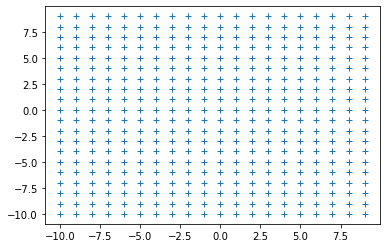

In [3]:
# Tha map is 20x20 sq meters
#Lets define a grid of nxn
n = 20
gmap = zeros(n*n) # the map is a grid of nxn

# x and y coordinates for the grid cells. Lowest and leftest point in the cell.
cell_w = 20/n
grid_x, grid_y = np.mgrid[-10:10:cell_w,-10:10:cell_w]
# Convert the matrix into a vector
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()

plot(grid_x, grid_y, '+')

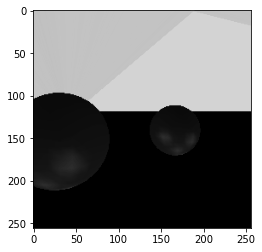

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray, cmap='gray')

In [21]:

def circlesFromImage(image, orientation):
#     img = cv2.medianBlur(image,5)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7,7), sigmaX=-1, sigmaY=-1)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, gray.shape[0] / 8, param1=30,param2=30,minRadius=10,maxRadius=0)
    
    imshow(gray, cmap='gray')
#     print(circles)
    if circles is not None:
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # In pixels
            radius = circle[2]  # In pixels

            # plot circle
            s = linspace(0,2*pi,100)
            cx = cos(s)*radius + center [0]
            cy = sin(s)*radius + center [1]
            # Plot center
            plot(center[0], center[1], '*')

            plot(cx,cy)
    plt.show()
    return circles


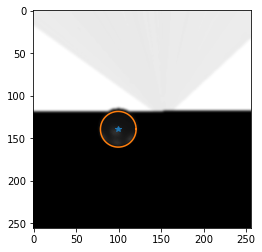

[ 99.5 139.5  21. ]




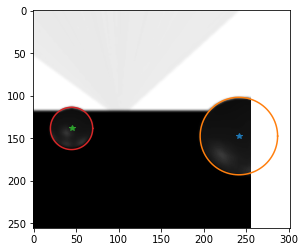

[241.5 147.5  45.6]


[ 44.5 138.5  24.9]




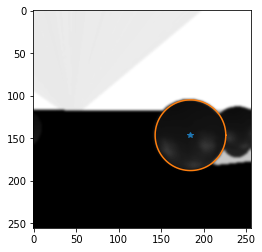

[184.5 146.5  41.6]




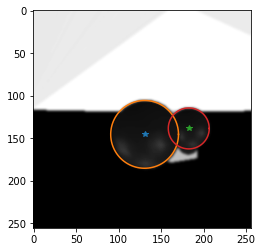

[130.5 145.5  39.9]


[182.5 138.5  24.1]




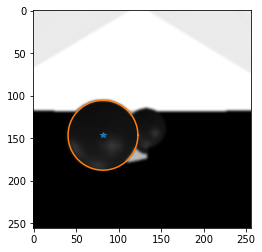

[ 81.5 146.5  41.1]




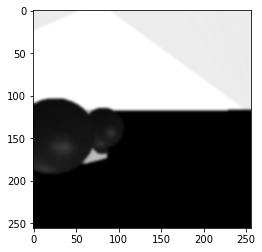

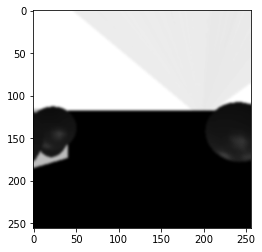

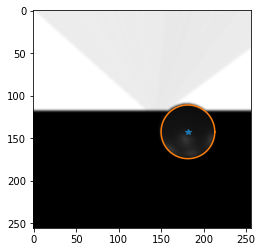

[181.5 142.5  31.6]




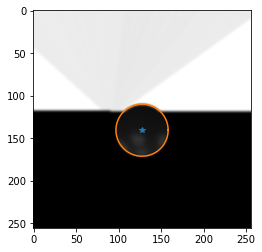

[127.5 140.5  30.7]




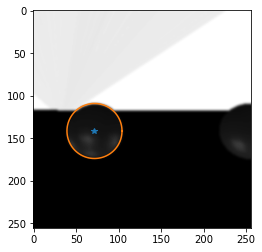

[ 71.5 141.5  32.4]




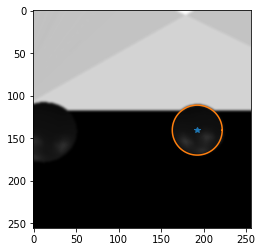

[192.5 140.5  29.4]




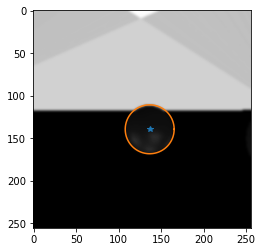

[136.5 139.5  28.8]




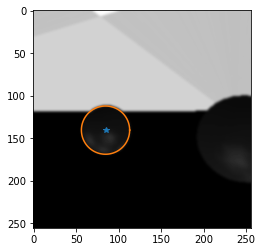

[ 84.5 140.5  28.4]




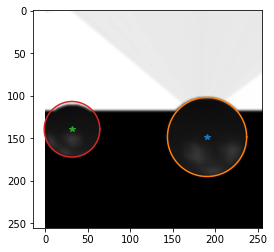

[190.5 148.5  46.6]


[ 31.5 139.5  32.7]




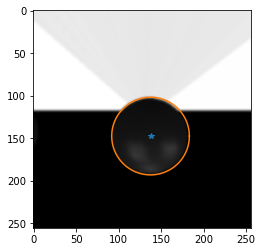

[137.5 147.5  45.7]




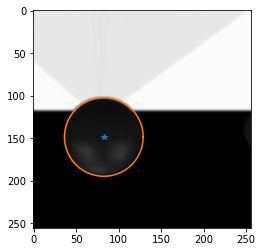

[ 82.5 148.5  46.3]




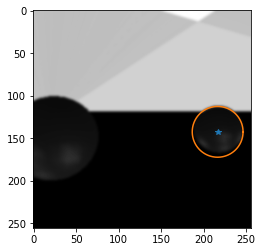

[216.5 142.5  29.9]




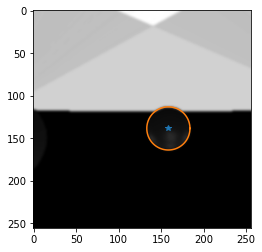

[158.5 138.5  25.4]




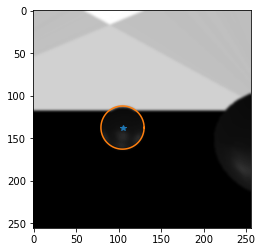

[104.5 137.5  25.4]




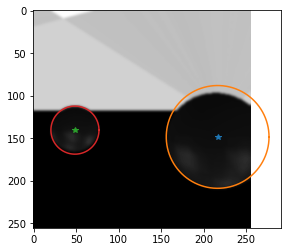

[216.5 148.5  60.5]


[ 48.5 140.5  28.3]




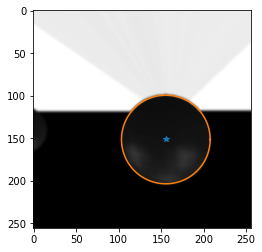

[155.5 151.5  52.2]




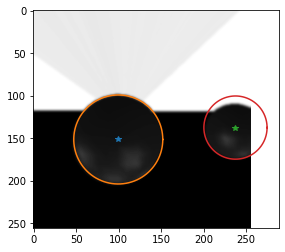

[ 99.5 151.5  52.4]


[237.5 137.5  37.2]




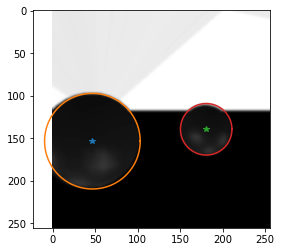

[ 46.5 153.5  56.3]


[180.5 139.5  30.3]




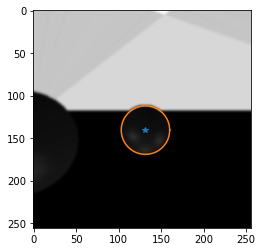

[131.5 140.5  28.5]




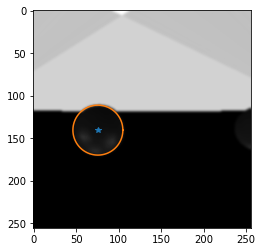

[ 75.5 140.5  29.4]




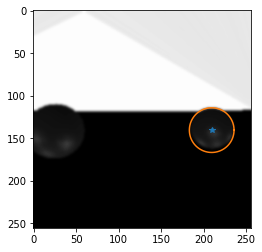

[209.5 140.5  26.3]




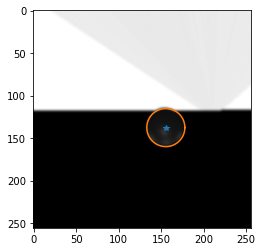

[155.5 137.5  22.4]




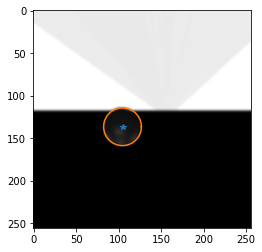

[104.5 136.5  22.2]




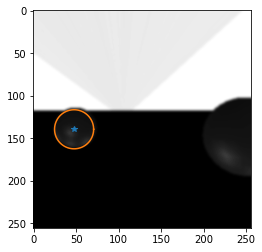

[ 47.5 139.5  23. ]




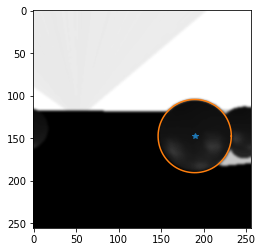

[189.5 147.5  43.1]




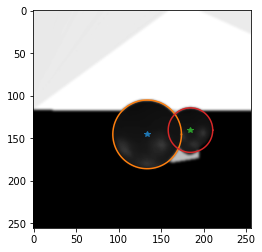

[133.5 145.5  40.4]


[184.5 140.5  26.2]




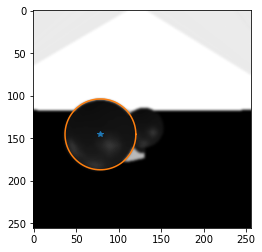

[ 78.5 145.5  41.7]




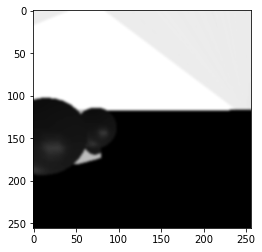

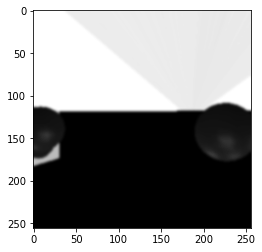

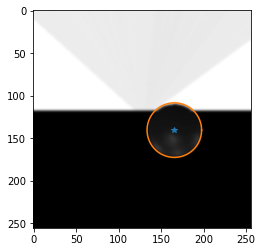

[165.5 140.5  32.1]




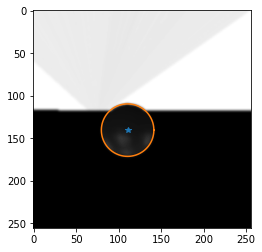

[110.5 140.5  30.9]




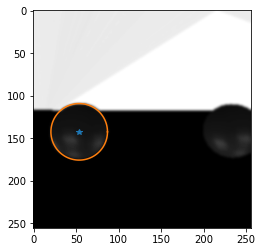

[ 53.5 142.5  33.3]




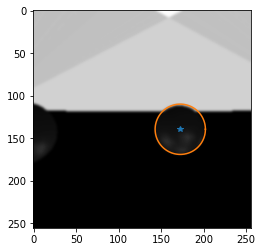

[172.5 139.5  29.6]




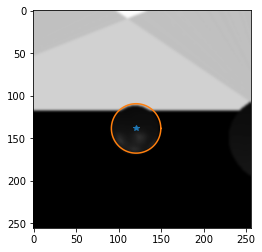

[120.5 138.5  29.1]




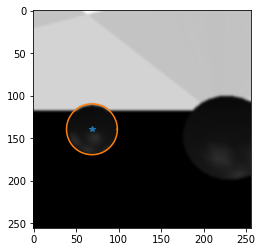

[ 68.5 139.5  29.9]




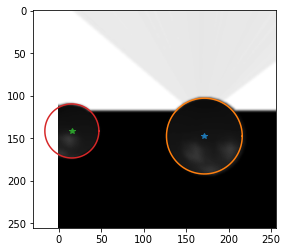

[171.5 147.5  44.6]


[ 15.5 141.5  31.8]




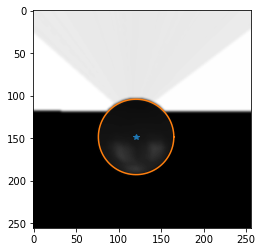

[120.5 148.5  44.4]




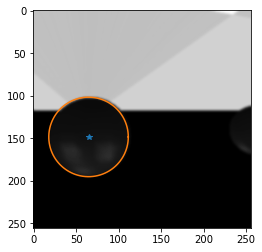

[ 64.5 148.5  46.8]




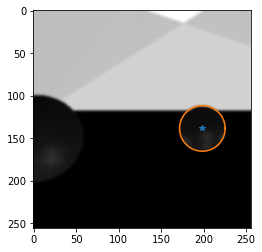

[198.5 138.5  26.8]




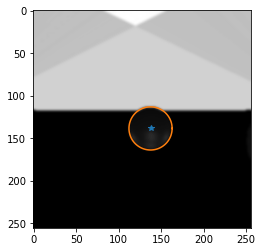

[137.5 138.5  25.4]




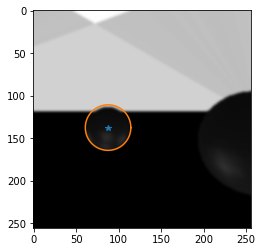

[ 87.5 137.5  26.8]




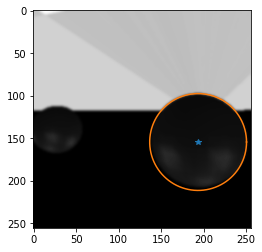

[193.5 154.5  57. ]




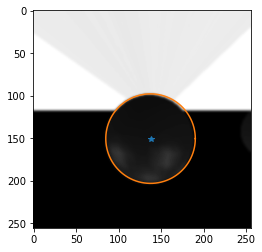

[137.5 150.5  52.7]




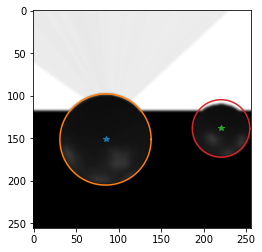

[ 84.5 151.5  53.7]


[220.5 138.5  33.8]




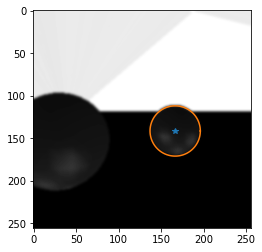

[166.5 141.5  29.6]




In [22]:

world_circles = []
for capture in captures:
    image = capture[0]
    orientation = capture[1]
    image_circles = circlesFromImage(image, orientation)
    if image_circles is None:
        continue
    for circ in image_circles[0, :]:
        print(circ)
        print('\n')
        world_circles.append( (circ, orientation) )
    
# imshow(img)

In [23]:


def xzFromCircle(center, radius):
    u0, v0 = 132, 132


    k = radius / (1.5 / 2)  # Pixels per meters (radius in pixels / radius in  meters)
    fov = 60  # degrees

    # number of pixels in x-axis
    npx = 264

    # maximum value in the x-axis (in meters)
    xmax = npx / (2.* k)

    # Distance to the center of the sphere (z-axis coordinate)
    zc = xmax / tan(pi/6)
#     zc

    # Location of the sphere in the x-axis coordinate
    xc = (center[0] - u0) / k
#     xc

    return (xc, zc, k)

In [24]:
finalCircleData = []
for current in world_circles:
#     print(current)
    circle = current[0]
    orientation = current[1]
    center = (circle[0], circle[1])  # In pixels
    radius = circle[2]  # In pixels
    xc,zc,k = xzFromCircle(center, radius)
    print(f'{xc} {zc} Orientation: {orientation}')

    

-1.1607142857142858 8.165382378538993 Orientation: [-0.002090509980916977, -0.00012248498387634754, -1.4670199155807495]
1.8009869023703493 3.7603735896314388 Orientation: [-0.0035005768295377493, 0.0005538782570511103, -1.6991043090820312]
-2.6355422090513883 6.88646717173886 Orientation: [-0.0035005768295377493, 0.0005538782570511103, -1.6991043090820312]
0.9465144577948664 4.121947986512316 Orientation: [-0.003327334066852927, 0.0013617544900625944, -1.9332695007324219]
-0.028195487643536344 4.297569508565117 Orientation: [-0.0017786342650651932, 0.0012827079044654965, -2.159252643585205]
1.5715767386095874 7.115063370752598 Orientation: [-0.0017786342650651932, 0.0012827079044654965, -2.159252643585205]
-0.9215328809281651 4.172093341007983 Orientation: [-0.0007274536183103919, 0.000873162061907351, -2.3823235034942627]
1.1748417579694126 5.4263616417508285 Orientation: [-9.86321538221091e-05, 0.0025864252820611, -3.0806519985198975]
-0.10993485068815521 5.58544057615524 Orientatio

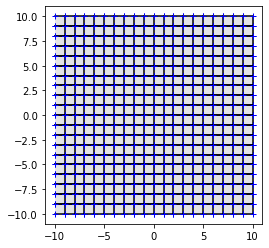

In [25]:
# Computes the four points of the square that composes a cell
def points_cell(x, y, d):    
    X = [x, x+d, x+d, x]
    Y = [y, y, y+d, y+d]
    return X, Y

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
# plot each cell
for x, y in zip(grid_x, grid_y):
    X, Y = points_cell(x, y, cell_w)
    cell = plt.Polygon([(xi, yi) for xi, yi in zip(X,Y)], color='0.9')
    
    ax.add_patch(cell)

    plot(X,Y, 'k-')
    plot(X,Y, 'b+')    
    
fig.canvas.draw()

In [41]:
l0 = (0.3/(1-0.3))  # Initial belief
gmap = l0 * ones(n*n) # Initial belief

    

# For each cell, check if the circle is in it.
for i in range(n*n):
    x, y = grid_x[i], grid_y[i]
    for current in world_circles:

        circle = current[0]
        orientation = current[1]
        center = (circle[0], circle[1])  # In pixels
        radius = circle[2]  # In pixels
        xc,zc,k = xzFromCircle(center, radius)
        gamma = orientation[2]
        if(gamma < 0):
            gamma = gamma + 2*pi
        
#         k = radius / (1.5 / 2)
        c, s = np.cos(gamma), np.sin(gamma)
        R = np.array(((c, -s), (s, c)))
        coords = np.array((x,y))
        diff = np.array((xc, zc))
#         x_new,y_new = np.inner(R,coords)
        x_new = x
        y_new = y
        xc,zc = np.inner(R,diff)
#         if x_new < 0 or x_new > 10 or y_new < 0 or y_new > 10:
#             continue

#         print(f'{x_new} {y_new} Orientation: {orientation}')
        print(gamma)

        X, Y = points_cell(x_new, y_new, cell_w)
        # check based on the ecuclidean distance
        dist = sqrt((xc - X)**2 + (zc - Y)**2)

        # Check if At least one of the borders is within the sphere
        if((dist < radius/k).any()):
            po = 0.8  # P(mi/zt) probability of having an obstacle 
            li = log(po / (1-po)) + gmap[i] - l0
            gmap[i] = li  # P(mi/zt) 
#             print(li)
        else:
            po = 0.05  # P(mi/zt) probability of having an obstacle given a non-detected obstacle

            # Cells within the fov. Check if the four points are withing the FOV
            thetas = np.arctan2(Y,X) - pi/2 
            if np.logical_and(-pi/6 <thetas-gamma, thetas+gamma < pi/6).all():
                li = log(po / (1-po)) + gmap[i] - l0
                gmap[i] = li

            pass

4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895

2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705

1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729

5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953

6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178

1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353

0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54

6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393

4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123

0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831

6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668

1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023

0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831

3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891

6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115

4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375

1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802

1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353

2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064

2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949

0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223

1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802

1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735

0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295062545930044
5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662

5.061674181615011
4.834007684384481
4.601723496113912
4.375127736722128
4.130185667668478
4.130185667668478
3.8891459147082728
3.139589786529541
2.8949015140533447
2.6520955562591553
2.4064459800720215
2.1729397773742676
1.9537971019744873
1.735037922859192
1.735037922859192
1.5044491291046143
1.2759077548980713
1.031167984008789
0.7662899494171143
0.54756760597229
0.30098026990890503
0.05668904259800911
6.115953628216879
6.115953628216879
5.895324085150854
4.816165391598837
4.584080998097555
4.584080998097555
4.349915806447164
4.123932663594381
4.123932663594381
3.9008618036853235
3.2025333086596888
2.9705684185028076
2.72822904586792
2.4944088459014893
2.247950315475464
2.023045778274536
1.802993893623352
1.802993893623352
1.5782297849655151
1.3353110551834106
1.1056057214736938
0.8627581596374512
0.6223042607307434
0.3831682503223419
0.3831682503223419
0.1393681913614273
6.178302724157469
6.178302724157469
5.953670714293615
5.953670714293615
5.738967422639028
5.499808434640066
5.295

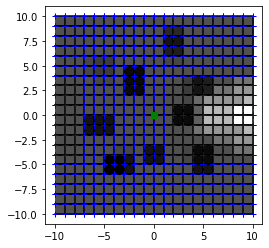

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# normalize gmap
gmap = gmap - min(gmap)
gmap = gmap / max(gmap)

# plot each cell
for c, x, y in zip(gmap, grid_x, grid_y):
    X, Y = points_cell(x, y, cell_w)
    if np.isnan(c):
        c=0
    cell = plt.Polygon([(xi, yi) for xi, yi in zip(X,Y)], color='%f'%(1-c))
    
    ax.add_patch(cell)

    plot(X,Y, 'k-')
    plot(X,Y, 'b+')    
    plot(0,0, 'go')
    
fig.canvas.draw()